# Algorithms Implementation for Classification Task using Python

## Import libraries

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, \
                        AdaBoostClassifier, GradientBoostingClassifier
pylab.rcParams['figure.figsize'] = (10, 7)

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Load Dataset

In [2]:
data = pd.read_csv('dataset/loan_dataset.csv', index_col='Loan_ID')
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y


In [3]:
data.shape

(480, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, LP001003 to LP002990
Data columns (total 12 columns):
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null object
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null int64
Loan_Amount_Term     480 non-null int64
Credit_History       480 non-null int64
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 48.8+ KB


## Eksplorasi Data

### Distribusi Kelas

In [5]:
data['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [6]:
data['Loan_Status'].value_counts(normalize=True)

Y    0.691667
N    0.308333
Name: Loan_Status, dtype: float64

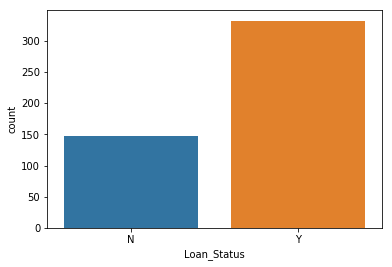

In [7]:
sns.countplot(x=data.Loan_Status)
plt.show()

### Matrix Plot

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


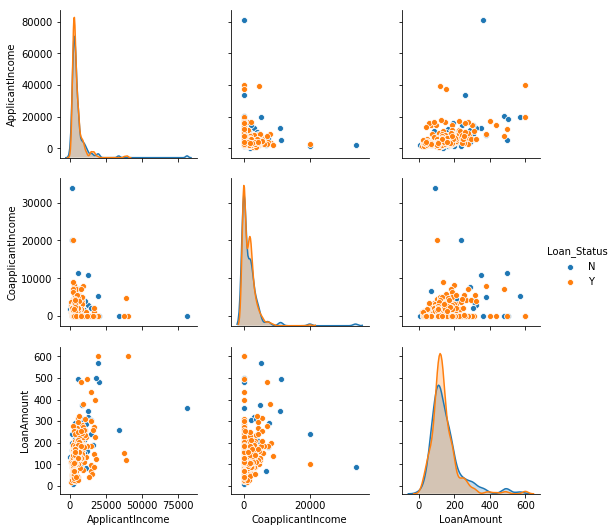

In [8]:
sns.pairplot(data=data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Status']], hue='Loan_Status')
plt.show()

## Encode Variabel Kategorik

In [9]:
var_kategori = ['Gender','Married','Education','Self_Employed','Dependents','Credit_History','Loan_Status', 'Property_Area']
for feature in var_kategori:
        if feature in data.columns.values:
            data[feature] = LabelEncoder().fit_transform(data[feature])
# dataset = pd.get_dummies(data, columns=['Property_Area'])

In [10]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,1,1,1,0,0,4583,1508.0,128,360,1,0,0
LP001005,1,1,0,0,1,3000,0.0,66,360,1,2,1
LP001006,1,1,0,1,0,2583,2358.0,120,360,1,2,1
LP001008,1,0,0,0,0,6000,0.0,141,360,1,2,1
LP001011,1,1,2,0,1,5417,4196.0,267,360,1,2,1


## Train-Test Split

In [11]:
y = data['Loan_Status']
x = data.drop(['Loan_Status'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 123)

## Training Model dan Prediksi

### Decision Tree Classifier

In [12]:
DecisionTree = DecisionTreeClassifier(random_state=123)
DecisionTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [13]:
DecisionTree.score(x_train, y_train)

1.0

In [14]:
DecisionTree.score(x_test, y_test)

0.675

In [15]:
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz

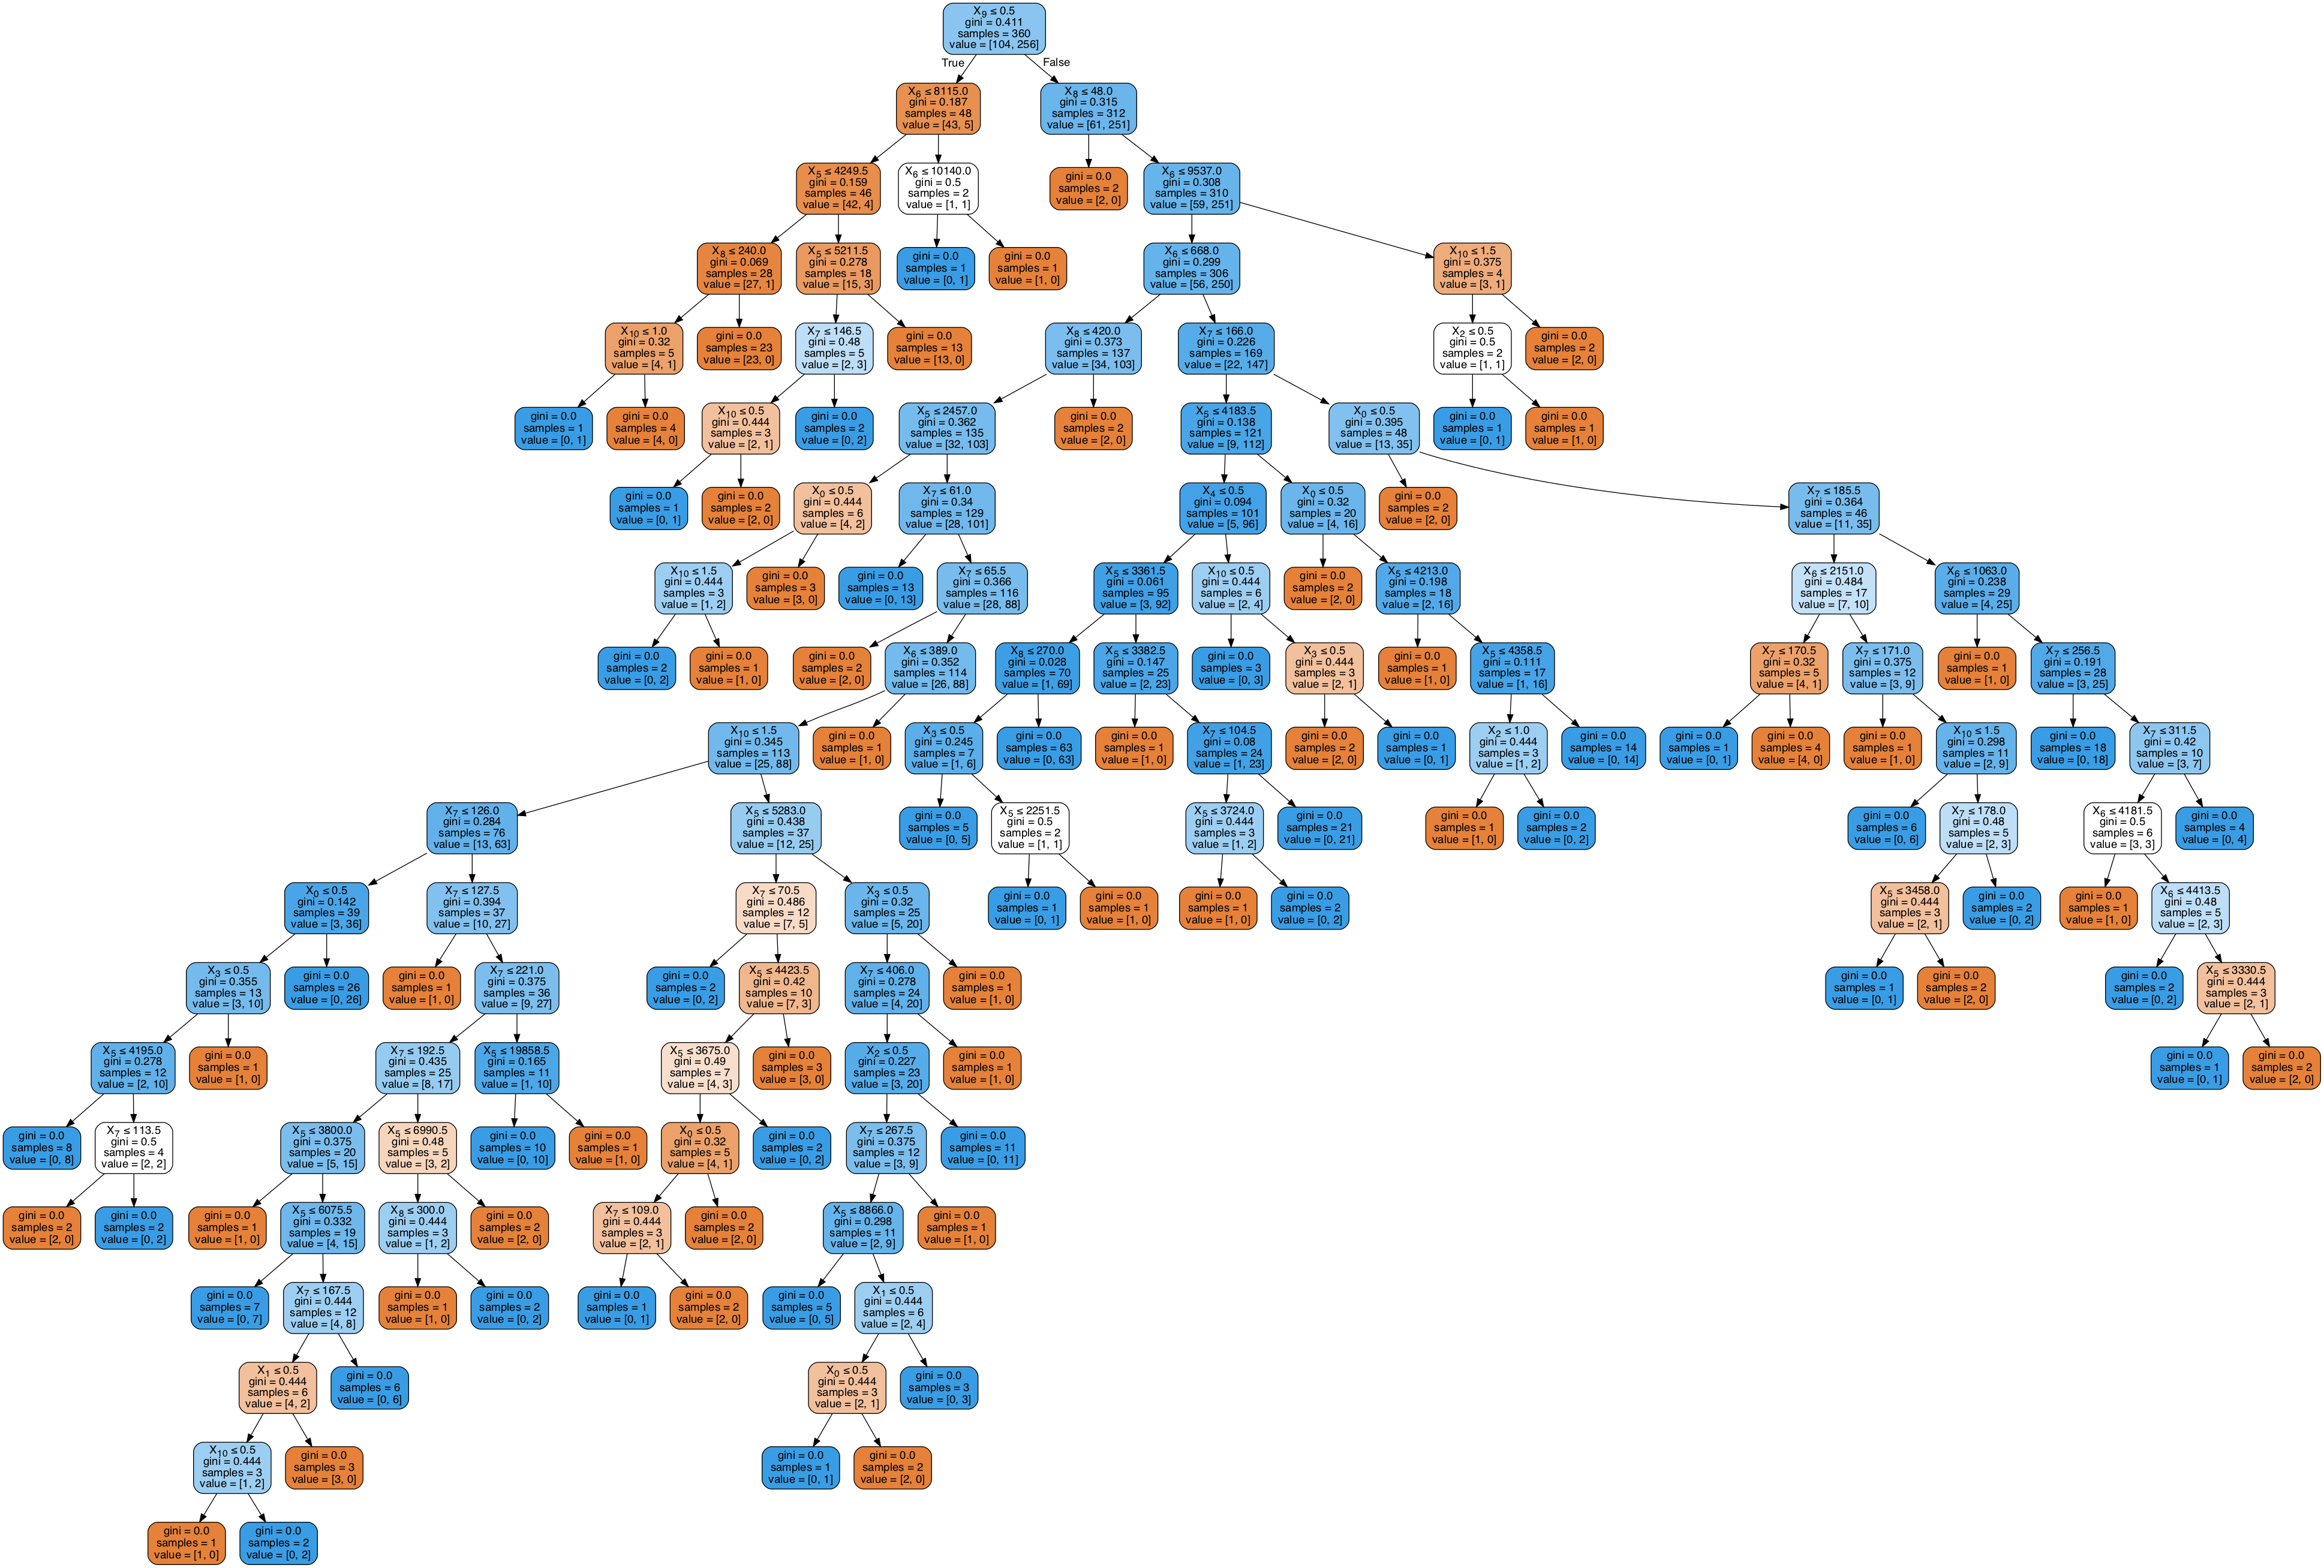

In [16]:
# Create DOT data
dot_data = export_graphviz(DecisionTree, out_file=None, filled=True, rounded=True, special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Bagging

In [17]:
Bagging = BaggingClassifier(random_state=123)
Bagging.fit(x_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=123,
         verbose=0, warm_start=False)

In [18]:
Bagging.score(x_train, y_train)

0.9916666666666667

In [19]:
Bagging.score(x_test, y_test)

0.7416666666666667

### Random Forest

In [20]:
RF = RandomForestClassifier(random_state=123)
RF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [21]:
RF.score(x_train, y_train)

0.9944444444444445

In [22]:
RF.score(x_test, y_test)

0.7583333333333333

### Gradient Boosting

In [23]:
GB = GradientBoostingClassifier(random_state=123)
GB.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False)

In [24]:
GB.score(x_train, y_train)

0.9138888888888889

In [25]:
GB.score(x_test, y_test)

0.7916666666666666

### Adaptive Boosting

In [26]:
AB = AdaBoostClassifier(random_state=123)
AB.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=123)

In [27]:
AB.score(x_train, y_train)

0.8611111111111112

In [28]:
AB.score(x_test, y_test)

0.7666666666666667

## Model Tuning

### Decision Tree

In [29]:
def GridSearch(x, y, model, parameters):
    clf = GridSearchCV(model, parameters, scoring='accuracy', n_jobs=-1, cv=5, verbose=1)
    clf.fit(x, y)
    print("Best Score: "+str(clf.best_score_))
    print("Best Params: "+str(clf.best_params_))
    return (clf)

In [30]:
ListParams = {
    'criterion': ['gini','entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['auto','sqrt','log2',None],
    'max_depth':[3,6,9],
    'class_weight':['balanced', None]
}

BestDecisionTree = GridSearch(x_train, y_train, DecisionTreeClassifier(random_state=123), ListParams)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Score: 0.8138888888888889
Best Params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'splitter': 'random'}


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    1.1s finished


In [31]:
BestDecisionTree.score(x_train, y_train)

0.825

In [32]:
BestDecisionTree.score(x_test, y_test)

0.7833333333333333

In [33]:
BestDecisionTree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, random_state=123, splitter='random')
BestDecisionTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='random')

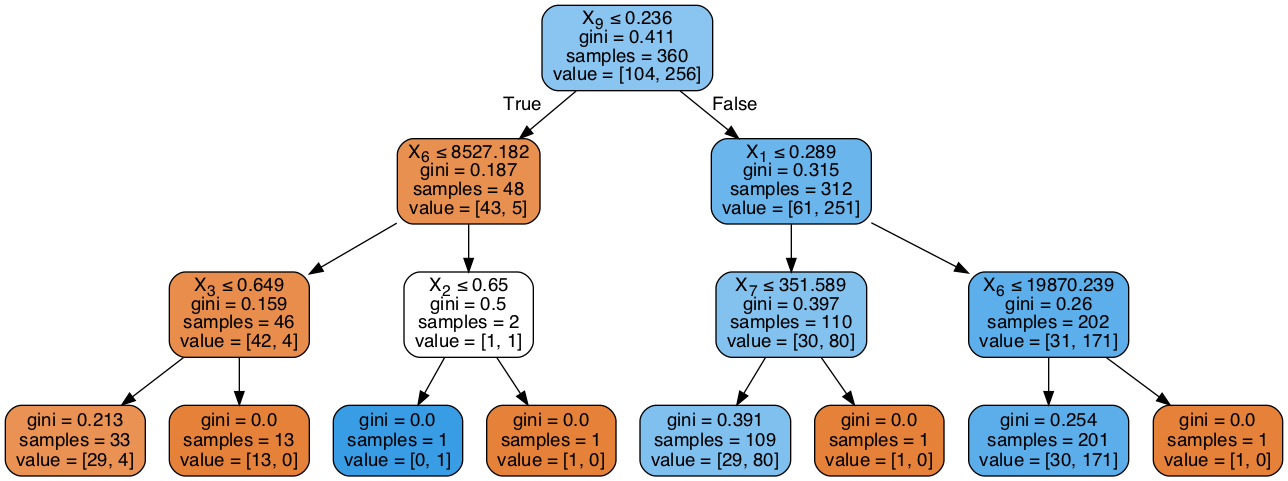

In [34]:
# Create DOT data
dot_data = export_graphviz(BestDecisionTree, out_file=None, filled=True, rounded=True, special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Random Forest

In [35]:
ListParams = {
    'n_estimators': [50, 75, 100, 200],
    'max_depth':[1, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf' : [1, 2, 4, 6, 8, 10],
    'max_features': [0.1, 'sqrt', 'log2', None]
}

BestRF = GridSearch(x_train, y_train, RandomForestClassifier(random_state=123), ListParams)

Fitting 5 folds for each of 672 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 518 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 868 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1318 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1868 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2518 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3268 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed:  4.2min finished


Best Score: 0.8194444444444444
Best Params: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 6, 'n_estimators': 100}


In [36]:
RF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [37]:
BestRF.score(x_train, y_train)

0.8194444444444444

In [38]:
BestRF.score(x_test, y_test)

0.7833333333333333

### Adapative Boosting

In [39]:
ListParams = {
    'n_estimators': [50, 75, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'algorithm' : ['SAMME', 'SAMME.R']
}

BestAB = GridSearch(x_train, y_train, AdaBoostClassifier(random_state=123), ListParams)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    5.3s


Best Score: 0.8166666666666667
Best Params: {'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   15.9s finished


In [40]:
AB

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=123)

In [41]:
BestAB.score(x_train, y_train)

0.8166666666666667

In [42]:
BestAB.score(x_test, y_test)

0.7833333333333333

### Gradient Boosting

In [43]:
ListParams = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [50, 75, 100, 200],
    'max_depth':[3, 5, 7],
    'subsample': [0.5, 0.75, 1],
    'max_features': [0.1, 'sqrt', 'log2', None]
}

BestGB = GridSearch(x_train, y_train, GradientBoostingClassifier(random_state=123), ListParams)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 1052 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 1677 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2165 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2907 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3944 tasks      | elapsed:  4.1min


Best Score: 0.8166666666666667
Best Params: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'max_features': 0.1, 'n_estimators': 50, 'subsample': 1}


[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  4.8min finished


In [44]:
BestGB.score(x_train, y_train)

0.85

In [45]:
BestGB.score(x_test, y_test)

0.775